In [38]:
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

### Subsets or additional dataframes I've created so far:
- clean_covid_count: case counts with ZIP as int, and null rows still in there
- clean_covid_count1: set ZIP as index (don't use this for now)
- case_by_zip: cases grouped by zip with an index added

- vaccines: this was cleaned to remove rows with missing data (except zip)
- first_vax_shot: filtered vaccines to only have rows if dose is 1.0 (includes both protocals)

In [3]:
covid_count = pd.read_csv('../data/COVID_CountByZipPerDate_03292021.csv')

In [25]:
covid_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [19]:
covid_count.isnull().sum()

Specimen Collection Date      0
Zip                         376
Cases                         0
dtype: int64

In [22]:
clean_covid_count = covid_count.dropna()

In [116]:
covid_count.isnull().sum()

Specimen Collection Date      0
Zip                         376
Cases                         0
dtype: int64

In [115]:
clean_covid_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8456 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Specimen Collection Date  8456 non-null   object
 1   Zip                       8456 non-null   int64 
 2   Cases                     8456 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 264.2+ KB


In [26]:
clean_covid_count['Zip'] = clean_covid_count['Zip'].astype(int) #df['DataFrame Column'] = df['DataFrame Column'].astype(int)

<ipython-input-26-ce2becee37b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_covid_count['Zip'] = clean_covid_count['Zip'].astype(int) #df['DataFrame Column'] = df['DataFrame Column'].astype(int)


In [42]:
clean_covid_count1 = clean_covid_count.set_index('Zip')

In [4]:
vaccines = pd.read_csv('../data/vaccine_with_protocol.csv')

In [94]:
case_by_zip = clean_covid_count.groupby(['Zip']).sum()

In [96]:
case_by_zip = cases_by_zip.reset_index()

In [98]:
case_by_zip['Zip'] = cases_by_zip.loc[:, ['Zip']].astype(str)

In [100]:
case_by_zip

,index,Zip,Cases
0,0,37013.0,13354
1,1,37027.0,231
2,2,37069.0,16
3,3,37072.0,2984
4,4,37076.0,4279
5,5,37080.0,574
6,6,37115.0,4574
7,7,37138.0,2359
8,8,37189.0,479
9,9,37201.0,299


In [101]:
case_by_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   31 non-null     int64 
 1   Zip     31 non-null     object
 2   Cases   31 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 872.0+ bytes


<BarContainer object of 31 artists>

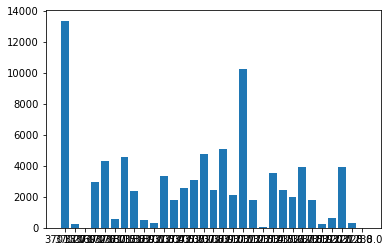

In [107]:
plt.bar(case_by_zip.Zip,
       case_by_zip.Cases)

<AxesSubplot:title={'center':'cases_by_zip'}, xlabel='Zip'>

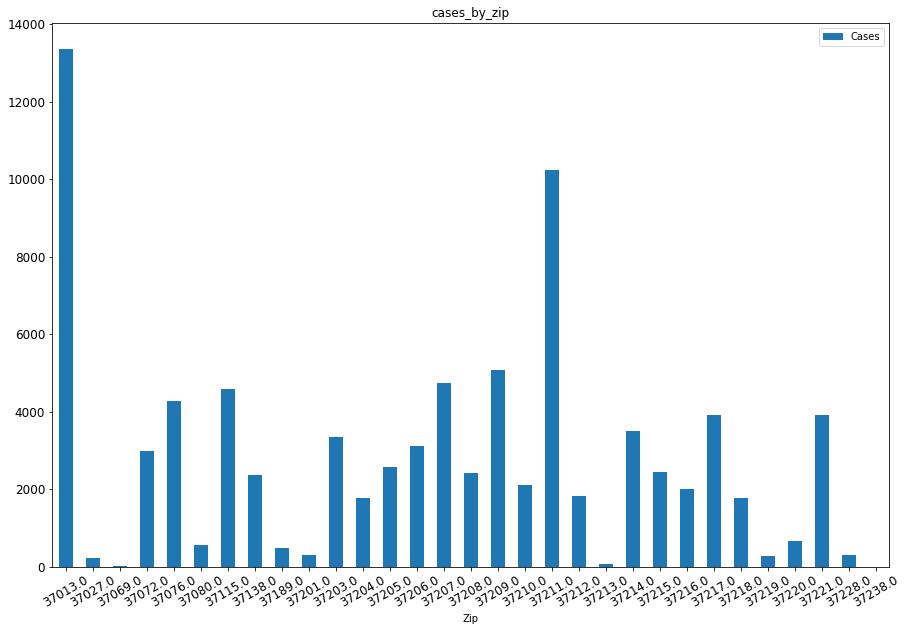

In [108]:
case_by_zip.plot.bar(x='Zip', y='Cases', rot=30, title='cases_by_zip', figsize=(15,10), fontsize=12)

In [109]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [114]:
vaccines.isnull().sum()

vacc_date        0
zipcode        232
count_given      0
dose_nbr         0
protocol         0
dtype: int64

In [113]:
vaccines = vaccines[vaccines['count_given'].notna()]
#this removed rows where the count_given was missing (and in turn also removed where dose_nbr was missing)

In [131]:
first_vax_shot=vaccines.loc[(vaccines['dose_nbr']==1.0)]

In [154]:
first_vax_shot = first_vax_shot.reset_index()

In [132]:
first_vax_shot.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot
5,2020-12-17,37013.0,16.0,1.0,two-shot


In [ ]:
vaccines_by_zip = 

<AxesSubplot:title={'center':'vaccines_by_zip'}, xlabel='zipcode'>

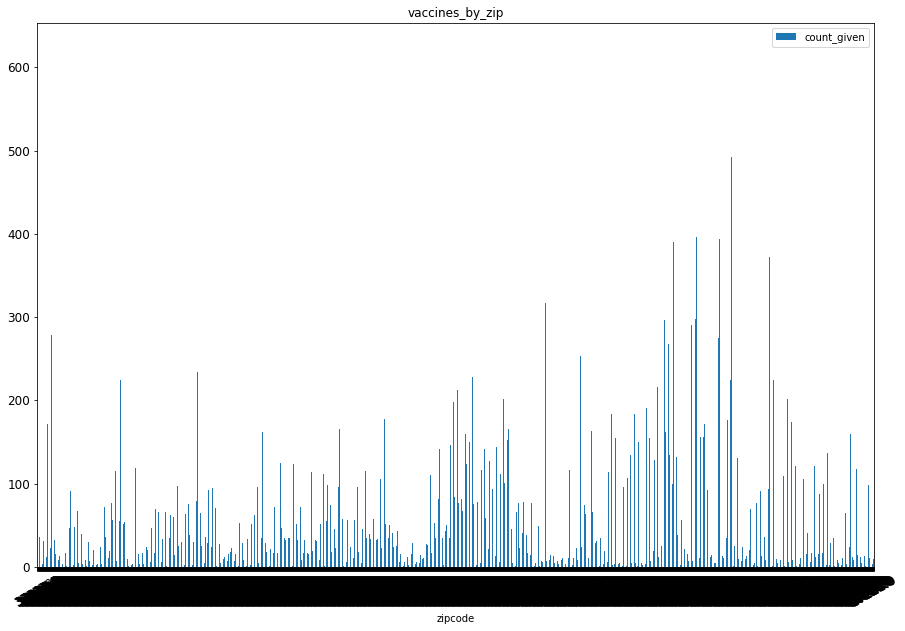

In [134]:
first_vax_shot.plot.bar(x='zipcode', y='count_given', rot=30, title='vaccines_by_zip', figsize=(15,10), fontsize=12)

In [155]:
zip_count = 0
zips_counted = []
print(first_vax_shot['zipcode'].keys())
for i in range(0, len(first_vax_shot['zipcode'])):
    print(i)
    print("x"+str(first_vax_shot['zipcode'][i])+"x")
    if first_vax_shot['zipcode'][i] not in zips_counted: 
        zips_counted.append(first_vax_shot['zipcode'][i])
        zip_count += 1
  
print("No.of.unique values :", zip_count)
  
print("unique values :", zips_counted)


RangeIndex(start=0, stop=3967, step=1)
0
x37215.0x
1
x37215.0x
2
x37221.0x
3
x37215.0x
4
x37013.0x
5
x37072.0x
6
x37076.0x
7
x37080.0x
8
x37115.0x
9
x37138.0x
10
x37189.0x
11
x37203.0x
12
x37204.0x
13
x37205.0x
14
x37206.0x
15
x37207.0x
16
x37208.0x
17
x37209.0x
18
x37210.0x
19
x37211.0x
20
x37212.0x
21
x37214.0x
22
x37215.0x
23
x37216.0x
24
x37217.0x
25
x37219.0x
26
x37220.0x
27
x37221.0x
28
xnanx
29
x37013.0x
30
x37072.0x
31
x37076.0x
32
x37080.0x
33
x37115.0x
34
x37138.0x
35
x37189.0x
36
x37201.0x
37
x37203.0x
38
x37204.0x
39
x37205.0x
40
x37206.0x
41
x37207.0x
42
x37208.0x
43
x37209.0x
44
x37210.0x
45
x37211.0x
46
x37212.0x
47
x37213.0x
48
x37214.0x
49
x37215.0x
50
x37216.0x
51
x37217.0x
52
x37218.0x
53
x37219.0x
54
x37220.0x
55
x37221.0x
56
x37228.0x
57
xnanx
58
x37013.0x
59
x37072.0x
60
x37076.0x
61
x37080.0x
62
x37115.0x
63
x37138.0x
64
x37189.0x
65
x37201.0x
66
x37203.0x
67
x37204.0x
68
x37205.0x
69
x37206.0x
70
x37207.0x
71
x37208.0x
72
x37209.0x
73
x37210.0x
74
x37211.0x
75
x

x37221.0x
869
x37228.0x
870
xnanx
871
x37013.0x
872
x37072.0x
873
x37076.0x
874
x37080.0x
875
x37115.0x
876
x37138.0x
877
x37189.0x
878
x37201.0x
879
x37203.0x
880
x37204.0x
881
x37205.0x
882
x37206.0x
883
x37207.0x
884
x37208.0x
885
x37209.0x
886
x37210.0x
887
x37211.0x
888
x37212.0x
889
x37214.0x
890
x37215.0x
891
x37216.0x
892
x37217.0x
893
x37218.0x
894
x37219.0x
895
x37220.0x
896
x37221.0x
897
xnanx
898
x37013.0x
899
x37027.0x
900
x37072.0x
901
x37076.0x
902
x37080.0x
903
x37115.0x
904
x37138.0x
905
x37189.0x
906
x37201.0x
907
x37203.0x
908
x37204.0x
909
x37205.0x
910
x37206.0x
911
x37207.0x
912
x37208.0x
913
x37209.0x
914
x37210.0x
915
x37211.0x
916
x37212.0x
917
x37213.0x
918
x37214.0x
919
x37215.0x
920
x37216.0x
921
x37217.0x
922
x37218.0x
923
x37220.0x
924
x37221.0x
925
x37228.0x
926
xnanx
927
x37013.0x
928
x37027.0x
929
x37069.0x
930
x37072.0x
931
x37076.0x
932
x37080.0x
933
x37115.0x
934
x37138.0x
935
x37189.0x
936
x37201.0x
937
x37203.0x
938
x37204.0x
939
x37205.0x
940
x372

x37218.0x
1619
x37219.0x
1620
x37220.0x
1621
x37221.0x
1622
x37228.0x
1623
xnanx
1624
x37013.0x
1625
x37027.0x
1626
x37069.0x
1627
x37072.0x
1628
x37076.0x
1629
x37080.0x
1630
x37115.0x
1631
x37138.0x
1632
x37189.0x
1633
x37201.0x
1634
x37203.0x
1635
x37204.0x
1636
x37205.0x
1637
x37206.0x
1638
x37207.0x
1639
x37208.0x
1640
x37209.0x
1641
x37210.0x
1642
x37211.0x
1643
x37212.0x
1644
x37213.0x
1645
x37214.0x
1646
x37215.0x
1647
x37216.0x
1648
x37217.0x
1649
x37218.0x
1650
x37219.0x
1651
x37220.0x
1652
x37221.0x
1653
x37228.0x
1654
xnanx
1655
x37013.0x
1656
x37027.0x
1657
x37072.0x
1658
x37076.0x
1659
x37080.0x
1660
x37115.0x
1661
x37138.0x
1662
x37189.0x
1663
x37201.0x
1664
x37203.0x
1665
x37204.0x
1666
x37205.0x
1667
x37206.0x
1668
x37207.0x
1669
x37208.0x
1670
x37209.0x
1671
x37210.0x
1672
x37211.0x
1673
x37212.0x
1674
x37214.0x
1675
x37215.0x
1676
x37216.0x
1677
x37217.0x
1678
x37218.0x
1679
x37219.0x
1680
x37220.0x
1681
x37221.0x
1682
x37228.0x
1683
xnanx
1684
x37013.0x
1685
x37072.

2368
x37217.0x
2369
x37218.0x
2370
x37219.0x
2371
x37220.0x
2372
x37220.0x
2373
x37221.0x
2374
x37221.0x
2375
x37228.0x
2376
xnanx
2377
xnanx
2378
x37013.0x
2379
x37013.0x
2380
x37027.0x
2381
x37069.0x
2382
x37072.0x
2383
x37072.0x
2384
x37076.0x
2385
x37076.0x
2386
x37080.0x
2387
x37115.0x
2388
x37115.0x
2389
x37138.0x
2390
x37138.0x
2391
x37189.0x
2392
x37189.0x
2393
x37201.0x
2394
x37203.0x
2395
x37203.0x
2396
x37204.0x
2397
x37204.0x
2398
x37205.0x
2399
x37205.0x
2400
x37206.0x
2401
x37206.0x
2402
x37207.0x
2403
x37207.0x
2404
x37208.0x
2405
x37209.0x
2406
x37209.0x
2407
x37210.0x
2408
x37210.0x
2409
x37211.0x
2410
x37211.0x
2411
x37212.0x
2412
x37212.0x
2413
x37214.0x
2414
x37214.0x
2415
x37215.0x
2416
x37215.0x
2417
x37216.0x
2418
x37216.0x
2419
x37217.0x
2420
x37217.0x
2421
x37218.0x
2422
x37218.0x
2423
x37219.0x
2424
x37219.0x
2425
x37220.0x
2426
x37220.0x
2427
x37221.0x
2428
x37221.0x
2429
x37228.0x
2430
xnanx
2431
xnanx
2432
x37013.0x
2433
x37013.0x
2434
x37027.0x
2435
x37069

3118
x37219.0x
3119
x37220.0x
3120
x37221.0x
3121
x37221.0x
3122
x37228.0x
3123
xnanx
3124
xnanx
3125
x37013.0x
3126
x37013.0x
3127
x37027.0x
3128
x37072.0x
3129
x37072.0x
3130
x37076.0x
3131
x37076.0x
3132
x37080.0x
3133
x37115.0x
3134
x37115.0x
3135
x37138.0x
3136
x37138.0x
3137
x37189.0x
3138
x37189.0x
3139
x37201.0x
3140
x37203.0x
3141
x37203.0x
3142
x37204.0x
3143
x37204.0x
3144
x37205.0x
3145
x37205.0x
3146
x37206.0x
3147
x37206.0x
3148
x37207.0x
3149
x37207.0x
3150
x37208.0x
3151
x37208.0x
3152
x37209.0x
3153
x37209.0x
3154
x37210.0x
3155
x37210.0x
3156
x37211.0x
3157
x37211.0x
3158
x37212.0x
3159
x37212.0x
3160
x37213.0x
3161
x37214.0x
3162
x37214.0x
3163
x37215.0x
3164
x37215.0x
3165
x37216.0x
3166
x37216.0x
3167
x37217.0x
3168
x37217.0x
3169
x37218.0x
3170
x37218.0x
3171
x37219.0x
3172
x37220.0x
3173
x37221.0x
3174
x37221.0x
3175
x37228.0x
3176
x37228.0x
3177
xnanx
3178
xnanx
3179
x37013.0x
3180
x37013.0x
3181
x37027.0x
3182
x37069.0x
3183
x37072.0x
3184
x37072.0x
3185
x37076

3932
x37205.0x
3933
x37205.0x
3934
x37206.0x
3935
x37206.0x
3936
x37207.0x
3937
x37207.0x
3938
x37208.0x
3939
x37208.0x
3940
x37209.0x
3941
x37209.0x
3942
x37210.0x
3943
x37210.0x
3944
x37211.0x
3945
x37211.0x
3946
x37212.0x
3947
x37212.0x
3948
x37213.0x
3949
x37214.0x
3950
x37214.0x
3951
x37215.0x
3952
x37215.0x
3953
x37216.0x
3954
x37216.0x
3955
x37217.0x
3956
x37217.0x
3957
x37218.0x
3958
x37218.0x
3959
x37219.0x
3960
x37220.0x
3961
x37220.0x
3962
x37221.0x
3963
x37221.0x
3964
x37228.0x
3965
xnanx
3966
xnanx
No.of.unique values : 169
unique values : [37215.0, 37221.0, 37013.0, 37072.0, 37076.0, 37080.0, 37115.0, 37138.0, 37189.0, 37203.0, 37204.0, 37205.0, 37206.0, 37207.0, 37208.0, 37209.0, 37210.0, 37211.0, 37212.0, 37214.0, 37216.0, 37217.0, 37219.0, 37220.0, nan, 37201.0, 37213.0, 37218.0, 37228.0, nan, nan, nan, 37238.0, nan, nan, 37027.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 37069.0, nan, n